In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import Series

from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.model_selection import train_test_split

In [2]:
# dataset united kingdom
#case = pd.read_csv('UK/case.csv')
#mobility = pd.read_csv('UK/mobility.csv')
#case.set_index('date', inplace=True)
#mobility.set_index('date', inplace=True)

# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
# Differencing order = 1
mobility_diff = mobility.diff(periods=1)
mobility_diff = mobility_diff.iloc[1:]
case = case.iloc[1:]
new_weather = new_weather.iloc[1:]
mobility_diff.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-03-19,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,9.0,3.0,16.0,-4.0,-22.0,4.0


In [5]:
data = pd.concat([case, new_weather], axis=1)
data.head()

,case,rh,avt,mxt,mnt
date,,,,,
2020-03-19,50,83.0,28.1,31.4,25.800000
2020-03-20,14,82.0,27.4,31.2,25.200000
2020-03-21,44,81.0,28.1,32.4,26.521978
2020-03-22,36,84.0,27.2,31.2,25.000000
2020-03-23,51,81.0,28.2,31.8,25.000000


In [6]:
model = VARMAX(data, exog=mobility_diff, order=(3, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                    Statespace Model Results                                   
Dep. Variable:     ['case', 'rh', 'avt', 'mxt', 'mnt']   No. Observations:                  422
Model:                                     VARMAX(3,1)   Log Likelihood               -5262.831
                                           + intercept   AIC                          10825.662
Date:                                 Sun, 22 Aug 2021   BIC                          11432.412
Time:                                         13:57:48   HQIC                         11065.431
Sample:                                     03-19-2020                                         
                                          - 05-14-2021                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):      0.01, 0.03, 0.00, 0.00, 0.00   Jarque-Bera (JB):   606.38, 5.24, 12.81, 13.89, 7.67
Prob(Q):                 0.

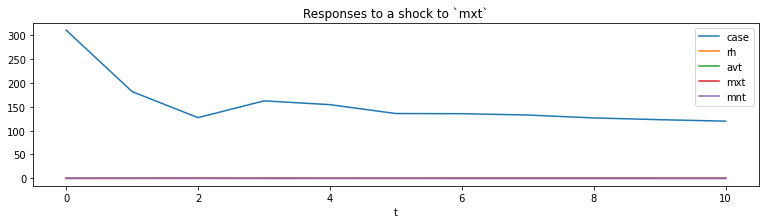

In [7]:
ax = model_fit.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `mxt`');

In [8]:
evalu = pd.read_csv('data/new/evaluation.csv')
mobility_exog = pd.read_csv('data/new/mobility_exog2.csv')

In [9]:
yhat = model_fit.forecast(steps=len(mobility_exog),exog=mobility_exog)
print(yhat)

                  case         rh        avt        mxt        mnt
2021-05-15  580.226759  72.680212  29.485483  34.225077  27.003940
2021-05-16  564.018860  74.709411  28.951969  33.724393  26.496178
2021-05-17  554.251188  74.210126  28.882149  33.648851  26.319461
2021-05-18  532.743863  74.074446  28.874406  33.653351  26.370432
2021-05-19  534.142040  74.421591  28.757753  33.487230  26.218305
2021-05-20  540.827240  74.208491  28.679742  33.332482  26.008825
2021-05-21  543.837970  74.165815  28.651082  33.236676  26.056908
2021-05-22  553.519188  74.922581  28.559166  33.236872  26.019202
2021-05-23  568.761458  75.969287  28.375077  33.012950  25.958645
2021-05-24  578.629516  75.751619  28.347743  32.951372  25.951835
2021-05-25  594.213818  75.382878  28.478559  33.125522  25.847582
2021-05-26  619.022588  74.198815  28.638581  33.204681  26.041473
2021-05-27  614.886384  74.476494  28.570037  33.125383  25.950678
2021-05-28  632.080170  74.556363  28.601843  33.071586  25.82

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [10]:
hasil = model_fit.forecast(steps=len(mobility_exog),exog=mobility_exog)
list_hasil = hasil['case'].tolist()
list_eval = evalu['case'].tolist()
test_list = [int(i) for i in list_hasil]
test_list

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


[580,
 564,
 554,
 532,
 534,
 540,
 543,
 553,
 568,
 578,
 594,
 619,
 614,
 632,
 644,
 645,
 665]

In [11]:
rms = mean_squared_error(list_eval, test_list, squared=False)
rms

269.84548955892166

In [12]:
mse = mean_squared_error(list_eval, test_list)
mse

72816.58823529411

In [13]:
mae = mean_absolute_error(list_eval, test_list)
mae

233.1764705882353